In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm
import sklearn.ensemble

import os

In [2]:

os.chdir("C:\\Users\\Will\\Desktop\\ML")
os.getcwd()

'C:\\Users\\Will\\Desktop\\ML'

In [3]:
input = 'Kidney_FPKM_Quantile_No-Outliers_5_17_18.tab'
annotation = 'kidneyannotation.txt'

In [4]:
def loadgem(gem, annot, attribute):
    
    gem = pd.read_table(gem, sep='\t')
    anot = pd.read_table(annot, sep='\t')
    gem = gem.T
    samples = gem.index
    cond = anot[attribute].to_frame()
    cond = cond.set_index(samples)
    gem[attribute] = cond
    gem = gem.fillna(-10)
    gem = gem.sort_values(attribute)
    
    return gem



In [5]:
def train(gem, attribute):
    
    X = gem.iloc[:, :-1]
    y = gem.loc[:, attribute]


    # split the dataset into train and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

    # print shapes of train set and test set
    print("X_train shape: (%d, %d)" % X_train.shape)
    print("y_train shape: (%d,)" % y_train.shape)
    print("X_test shape: (%d, %d)" % X_test.shape)
    print("y_test shape: (%d,)" % y_test.shape)

    model = sklearn.ensemble.RandomForestClassifier()

    model.fit(X_train, y_train) 

    y_pred = model.predict(X_test)

    accuracy = sum(y_pred == y_test) / len(y_test) * 100
    acc = "%0.2f" % accuracy

    print(str("Accuracy: " + str(acc) + "%"))
    
    return y_test, y_pred, X_train, model
    

In [6]:
#gem = loadgem(input, annotation, 'Treatment')
#train(gem, 'Treatment')

In [7]:

def confusion(gem, attribute, obj):

    classes = []
    cond = gem[attribute]
    for item in cond:
        if item not in classes:
            classes.append(item)



    # compute confusion matrix for the ground truth and predicted labels
    cnf_matrix = sklearn.metrics.confusion_matrix(obj[0], obj[1])

    # plot a heatmap of the confusion matrix
    title = str("Confusion Matrix: " + str(attribute))
    sns.heatmap(cnf_matrix, annot=True, fmt="d", cbar=False, square=True, xticklabels=classes, yticklabels=classes)
    plt.ylabel("Expected")
    plt.xlabel("Measured")
    plt.title(title)
    plt.show()


In [8]:
def extract(model):
    imp = pd.DataFrame(model[3].feature_importances_,
                                   index = model[2].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    return imp

In [9]:
def Main():
    
    count = 0
    for line in open(annotation):
        count +=1
        if count == 1:
            #skip sample column
            conditions = line.strip().split('\t')[1:]
            print(conditions)
        else:
            break
    
    for item in conditions:
        
        gem = loadgem(input, annotation, item)
        res = train(gem, item)
        conf = confusion(gem, item, res)
        feat = extract(res)
        print(feat)

['Cancer', 'Tissue']
X_train shape: (706, 60483)
y_train shape: (706,)
X_test shape: (303, 60483)
y_test shape: (303,)
Accuracy: 91.09%


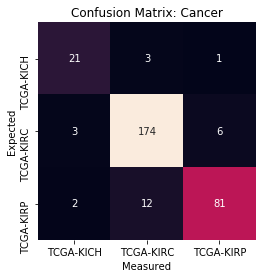

                    importance
ENSG00000280219.1     0.051741
ENSG00000204301.6     0.050918
ENSG00000183807.7     0.048227
ENSG00000187068.2     0.047743
ENSG00000125810.9     0.043924
ENSG00000116833.12    0.042446
ENSG00000152583.11    0.042207
ENSG00000163536.11    0.039112
ENSG00000179097.5     0.038402
ENSG00000109066.12    0.038243
ENSG00000108846.14    0.017577
ENSG00000103266.9     0.017304
ENSG00000092964.15    0.015847
ENSG00000196932.10    0.015419
ENSG00000273394.1     0.014384
ENSG00000225362.7     0.014135
ENSG00000138792.8     0.013227
ENSG00000229941.4     0.013179
ENSG00000113312.9     0.012645
ENSG00000006638.10    0.008847
ENSG00000162763.3     0.008723
ENSG00000147872.8     0.008598
ENSG00000240758.2     0.007811
ENSG00000146376.9     0.007428
ENSG00000205129.7     0.006733
ENSG00000230432.1     0.006343
ENSG00000256514.1     0.005968
ENSG00000140937.12    0.005658
ENSG00000156298.11    0.005570
ENSG00000173818.15    0.005347
...                        ...
ENSG0000

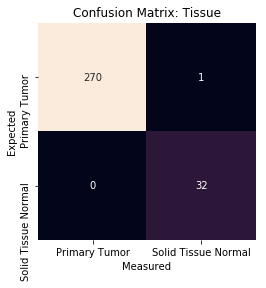

                    importance
ENSG00000258402.1     0.092580
ENSG00000196767.6     0.080561
ENSG00000170549.3     0.076780
ENSG00000228055.2     0.075536
ENSG00000279460.1     0.074847
ENSG00000147853.15    0.070303
ENSG00000061656.8     0.066822
ENSG00000114854.6     0.066627
ENSG00000127324.7     0.063443
ENSG00000109832.11    0.057028
ENSG00000132677.11    0.027988
ENSG00000165959.10    0.023275
ENSG00000185739.12    0.020022
ENSG00000168447.9     0.018789
ENSG00000174514.11    0.014058
ENSG00000117115.11    0.012289
ENSG00000090889.11    0.011551
ENSG00000185652.10    0.009873
ENSG00000255690.2     0.008749
ENSG00000164096.12    0.008527
ENSG00000126500.3     0.008013
ENSG00000267259.1     0.007642
ENSG00000118194.17    0.006440
ENSG00000183783.6     0.005423
ENSG00000187801.13    0.005158
ENSG00000153246.10    0.004020
ENSG00000148204.10    0.003827
ENSG00000270509.1     0.003812
ENSG00000089472.15    0.003724
ENSG00000116641.14    0.003692
...                        ...
ENSG0000

In [10]:
Main()